In [1]:
# Netflix Movie Analysis: Trends and Insights

# ## Introduction
# In this project, I analyzed Netflix's vast movie catalog to answer intriguing questions:
# - Are movies getting shorter over time?
# - How do genres and countries influence movie durations?
# - What trends can we observe over decades?
#
# The analysis leverages Python for data wrangling and visualization, offering key insights into the evolution of the entertainment industry.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load dataset
file_path = r'C:\Users\gouth\OneDrive - St. Lawrence College\workspace\workspace\netflix_data.csv'
netflix_data = pd.read_csv(file_path)



In [3]:
# Data Cleaning: Handling Missing Values
missing_values = netflix_data.isnull().sum()
print("Missing Values by Column:")
print(missing_values[missing_values > 0])



Missing Values by Column:
director      2389
cast           718
country        507
date_added      10
dtype: int64


In [4]:
# Fill missing 'director' column with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)



In [5]:
# Filter data for movies only
movies_data = netflix_data[netflix_data['type'] == 'Movie']




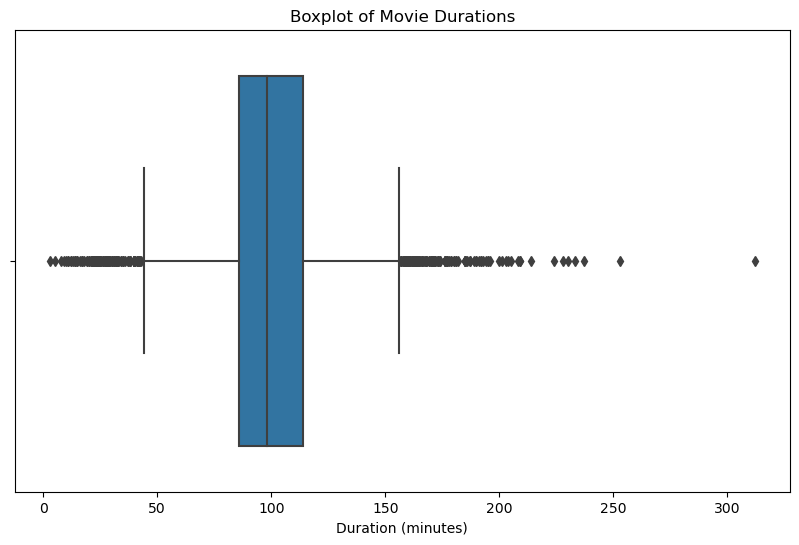

In [6]:
# Analyze Outliers in Duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies_data, x='duration')
plt.title('Boxplot of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()



In [7]:
# Filter out outliers (e.g., durations > 300 minutes)
outliers = movies_data[movies_data['duration'] > 300]
print("Movies with duration > 300 minutes:")
print(outliers[['title', 'duration', 'genre']])



Movies with duration > 300 minutes:
                          title  duration   genre
957  Black Mirror: Bandersnatch       312  Dramas


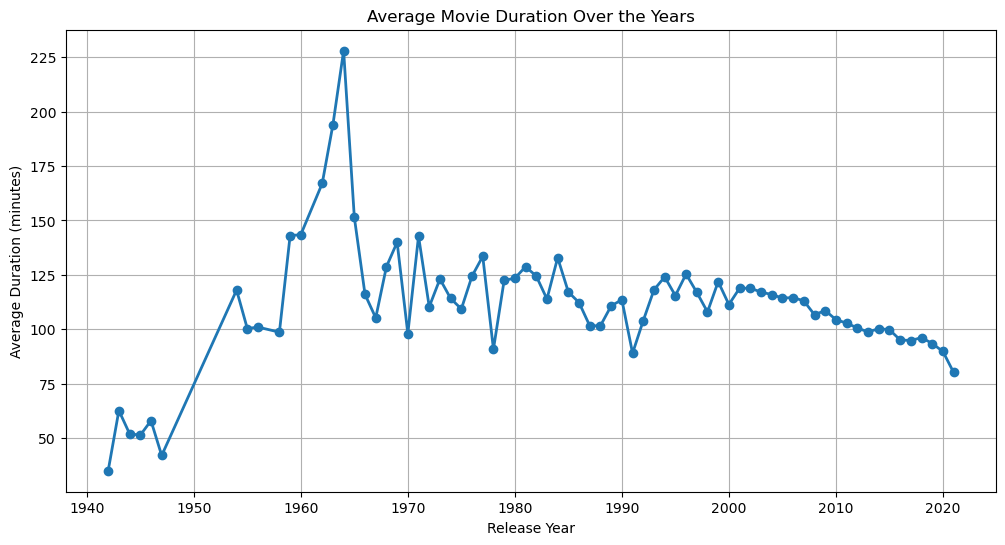

In [8]:
# Trend of Average Movie Duration Over the Years
movie_duration_trend = movies_data.groupby('release_year')['duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(movie_duration_trend['release_year'], movie_duration_trend['duration'], marker='o', linewidth=2)
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()



C:\Users\gouth\AppData\Local\Temp\ipykernel_17760\1343801828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['decade'] = (movies_data['release_year'] // 10) * 10


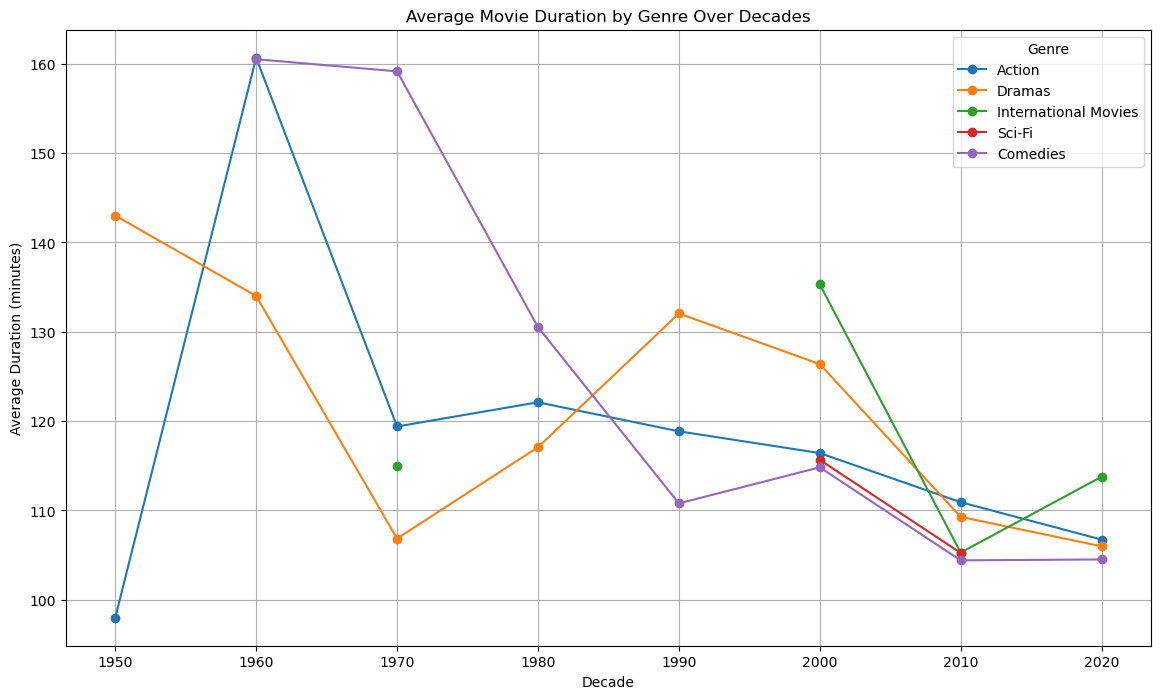

In [9]:
# Genre Analysis Over Decades
movies_data['decade'] = (movies_data['release_year'] // 10) * 10
decade_genre_trends = (
    movies_data.groupby(['decade', 'genre'])['duration']
    .mean()
    .reset_index()
)

decade_genre_pivot = decade_genre_trends.pivot(index='decade', columns='genre', values='duration')
plt.figure(figsize=(14, 8))
for genre in ['Action', 'Dramas', 'International Movies', 'Sci-Fi', 'Comedies']:
    if genre in decade_genre_pivot.columns:
        plt.plot(decade_genre_pivot.index, decade_genre_pivot[genre], marker='o', label=genre)

plt.title('Average Movie Duration by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Genre', fontsize=10)
plt.grid(True)
plt.show()



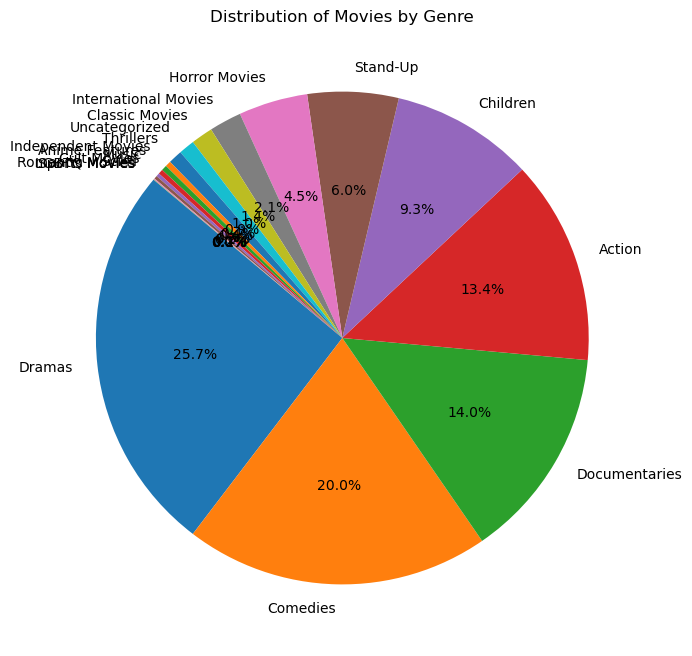

In [10]:
# Genre Distribution
genre_counts = movies_data['genre'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Genre')
plt.show()



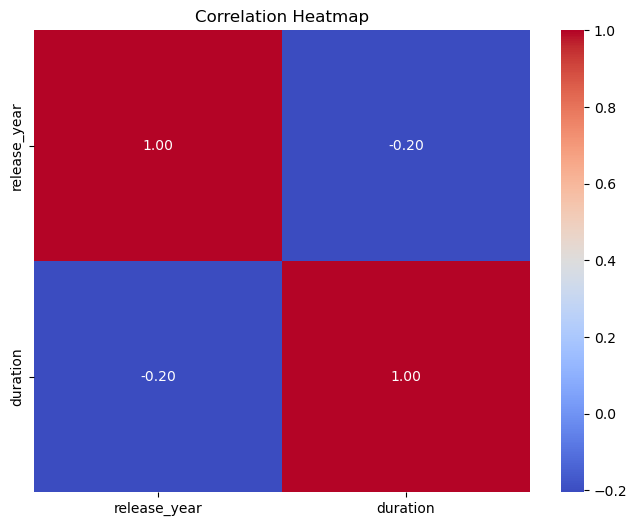

In [11]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = movies_data[['release_year', 'duration']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [12]:
# Reusable Function for Genre Analysis
def genre_analysis(genre_name, dataset=movies_data):
    genre_data = dataset[dataset['genre'] == genre_name]
    avg_duration = genre_data['duration'].mean()
    print(f"The average duration of {genre_name} movies is {avg_duration:.2f} minutes.")
    return genre_data



In [13]:
# Example usage
dramas_data = genre_analysis('Dramas')



The average duration of Dramas movies is 111.80 minutes.


In [14]:
# Key Insights
# 1. Average movie durations have been declining over the past few decades.
# 2. Dramas and Action movies are the longest genres but show a noticeable decrease in duration recently.
# 3. Countries like Croatia and India tend to produce longer movies on average.
# 4. Streaming platforms may favor shorter, more engaging content.

# Conclusion and Future Scope
# This analysis highlights fascinating trends in Netflix movies and opens avenues for further exploration:
# - Investigating the impact of streaming platforms on content duration.
# - Exploring audience engagement data to validate findings.
# - Expanding the analysis to include TV shows.

# I welcome feedback and ideas for refining this project further. Let’s collaborate!